# Assignment: Logistic Regression Model for Heart Disease Prediction



## Overview
In this assignment, you will apply logistic regression to predict heart disease based on various indicators. The goal is to build a predictive model using the logistic regression algorithm and evaluate its performance.


## Dataset
The dataset you will use is the [Personal Key Indicators of Heart Disease dataset](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) from Kaggle. It contains the following columns:

- `HeartDisease`: Indicates whether the respondent has heart disease (Yes or No).
- `BMI`: Body Mass Index.
- `Smoking`: Whether the respondent is a smoker (Yes or No).
- `AlcoholDrinking`: Heavy drinking (Yes or No).
- `Stroke`: Whether the respondent has had a stroke (Yes or No).
- `PhysicalHealth`: Number of days in poor physical health.
- `MentalHealth`: Number of days in poor mental health.
- `DiffWalking`: Difficulty walking (Yes or No).
- `Sex`: Gender of the respondent.
- `AgeCategory`: Age category of the respondent.
- `Race`: Race of the respondent.
- `Diabetic`: Whether the respondent is diabetic (Yes or No).
- `PhysicalActivity`: Whether the respondent gets physical activity (Yes or No).
- `GenHealth`: General health condition.
- `SleepTime`: Average hours of sleep.
- `Asthma`: Whether the respondent has asthma (Yes or No).
- `KidneyDisease`: Whether the respondent has kidney disease (Yes or No).
- `SkinCancer`: Whether the respondent has skin cancer (Yes or No).


### Task 1: Data Loading and Preprocessing


#### - Load the dataset using Pandas.

In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
od.download("https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease")

Skipping, found downloaded files in ".\personal-key-indicators-of-heart-disease" (use force=True to force download)


In [3]:
df = pd.read_csv('personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


#### - Handle any missing or null values if present.

In [4]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

### Task 2: Data Splitting

- Split the data into training and testing sets (70-30 split recommended).

In [7]:
df.shape

(319795, 18)

In [8]:
train_val_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.35, random_state=42)

In [9]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (145506, 18)
val_df.shape : (78350, 18)
test_df.shape : (95939, 18)


In [10]:
train_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
87527,No,30.67,No,No,No,0.0,2.0,No,Female,35-39,White,No,Yes,Very good,6.0,Yes,No,No
186164,No,23.41,No,No,No,0.0,3.0,No,Female,55-59,White,No,Yes,Very good,7.0,No,No,No
90262,No,22.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,No,No,Very good,9.0,No,No,No
168776,No,25.42,No,No,No,30.0,5.0,Yes,Male,50-54,White,No,Yes,Very good,7.0,No,No,No
17501,No,34.44,Yes,No,No,0.0,5.0,No,Male,40-44,White,Yes,Yes,Fair,5.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12447,No,31.25,No,No,No,30.0,15.0,Yes,Female,55-59,White,No,No,Poor,9.0,Yes,No,No
205060,No,35.51,No,No,No,0.0,0.0,Yes,Female,70-74,Black,Yes,Yes,Good,8.0,No,No,No
66440,No,18.79,No,No,No,0.0,0.0,No,Female,50-54,Other,No,Yes,Very good,7.0,No,No,No
28948,No,23.63,Yes,No,No,0.0,25.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No


In [11]:
input_cols=list(train_df.columns[1:])
input_cols

['BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [12]:
target_col='HeartDisease'
target_col

'HeartDisease'

In [13]:
train_inputs = train_df[input_cols]
train_target = train_df[target_col]
val_inputs = val_df[input_cols]
val_target = val_df[target_col]
test_inputs = test_df[input_cols]
test_target = test_df[target_col]

### Scaling the data

In [14]:
numerics = df.select_dtypes(include=np.number).columns.tolist()
categorical = df.select_dtypes('object').columns.tolist()
numerics

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [15]:
categoricals=df[categorical].columns[1:]
categoricals

Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(df[numerics])

StandardScaler()

In [19]:
train_inputs[numerics] = scaler.transform(train_inputs[numerics])
val_inputs[numerics] = scaler.transform(val_inputs[numerics])
test_inputs[numerics] = scaler.transform(test_inputs[numerics])

C:\Users\Bibhakar\AppData\Local\Temp\ipykernel_29316\4072025852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numerics] = scaler.transform(train_inputs[numerics])
C:\Users\Bibhakar\AppData\Local\Temp\ipykernel_29316\4072025852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numerics] = scaler.transform(val_inputs[numerics])
C:\Users\Bibhakar\AppData\Local\Temp\ipykernel_29316\4072025852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [20]:
train_inputs[numerics].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,145506.000000,145506.000000,145506.000000,145506.000000
mean,0.001790,-0.000994,0.000297,-0.000273
std,1.002077,0.998922,1.000351,1.001223
min,-2.565319,-0.424070,-0.490039,-4.245859
25%,-0.675793,-0.424070,-0.490039,-0.763977
50%,-0.155032,-0.424070,-0.490039,-0.067601
75%,0.493165,-0.172524,-0.112928,0.628776
max,10.327827,3.349118,3.281069,11.770800


#### - Convert categorical variables into dummy/indicator variables.

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [23]:
encoder.fit(df[categoricals])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [24]:
encoded_cols = list(encoder.get_feature_names_out(categoricals))

In [25]:
encoded_cols

['Smoking_No',
 'Smoking_Yes',
 'AlcoholDrinking_No',
 'AlcoholDrinking_Yes',
 'Stroke_No',
 'Stroke_Yes',
 'DiffWalking_No',
 'DiffWalking_Yes',
 'Sex_Female',
 'Sex_Male',
 'AgeCategory_18-24',
 'AgeCategory_25-29',
 'AgeCategory_30-34',
 'AgeCategory_35-39',
 'AgeCategory_40-44',
 'AgeCategory_45-49',
 'AgeCategory_50-54',
 'AgeCategory_55-59',
 'AgeCategory_60-64',
 'AgeCategory_65-69',
 'AgeCategory_70-74',
 'AgeCategory_75-79',
 'AgeCategory_80 or older',
 'Race_American Indian/Alaskan Native',
 'Race_Asian',
 'Race_Black',
 'Race_Hispanic',
 'Race_Other',
 'Race_White',
 'Diabetic_No',
 'Diabetic_No, borderline diabetes',
 'Diabetic_Yes',
 'Diabetic_Yes (during pregnancy)',
 'PhysicalActivity_No',
 'PhysicalActivity_Yes',
 'GenHealth_Excellent',
 'GenHealth_Fair',
 'GenHealth_Good',
 'GenHealth_Poor',
 'GenHealth_Very good',
 'Asthma_No',
 'Asthma_Yes',
 'KidneyDisease_No',
 'KidneyDisease_Yes',
 'SkinCancer_No',
 'SkinCancer_Yes']

In [26]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])

In [27]:
train_inputs[encoded_cols]

,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
87527,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
186164,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
90262,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
168776,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
17501,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12447,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
205060,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
66440,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
28948,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Task 3: Exploratory Data Analysis (EDA)


- Perform a basic EDA to understand the distributions of various features and the target variable.
- Visualize the relationship between the target variable and categorical variables.


In [28]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

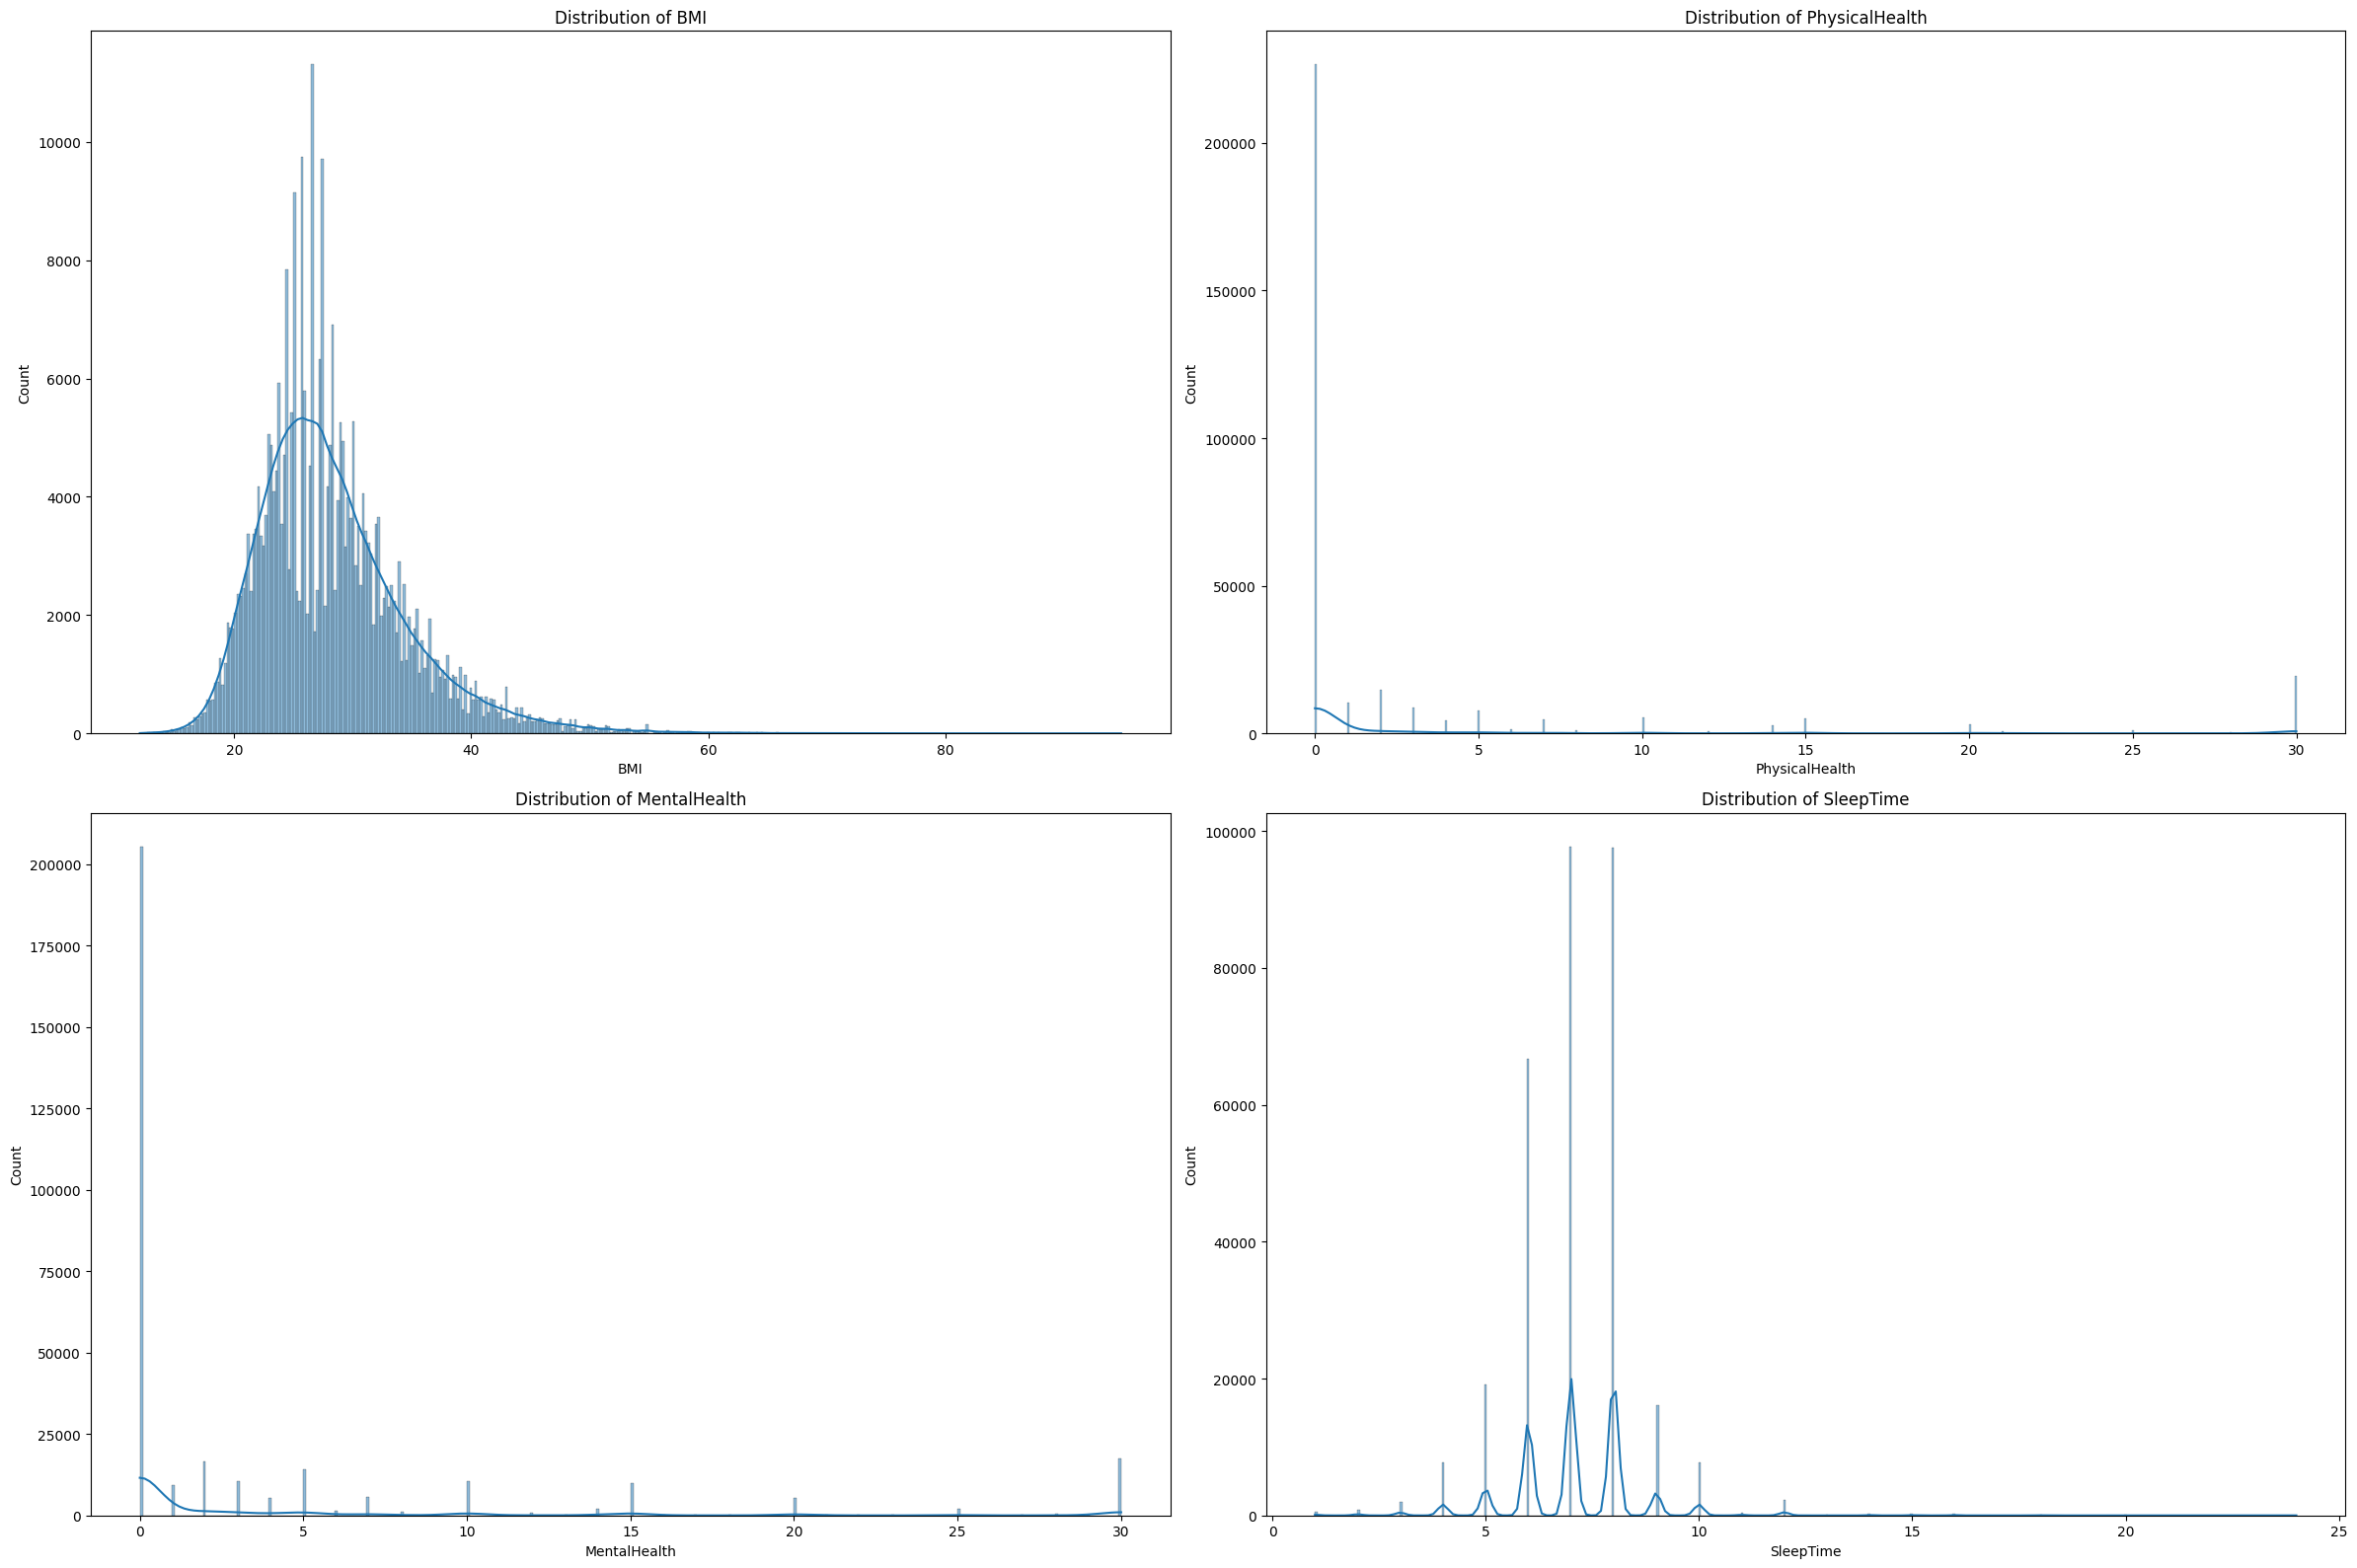

In [31]:
plt.figure(figsize=(24,16))
for i, feature in enumerate(numerics, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[feature],kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

C:\Users\Bibhakar\AppData\Local\Temp\ipykernel_29316\4185104739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')
C:\Users\Bibhakar\AppData\Local\Temp\ipykernel_29316\4185104739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')
C:\Users\Bibhakar\AppData\Local\Temp\ipykernel_29316\4185104739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')
C:\Users\Bibhakar\AppData\Local\Temp\ipykernel_29316\4185104739.py:4: Future

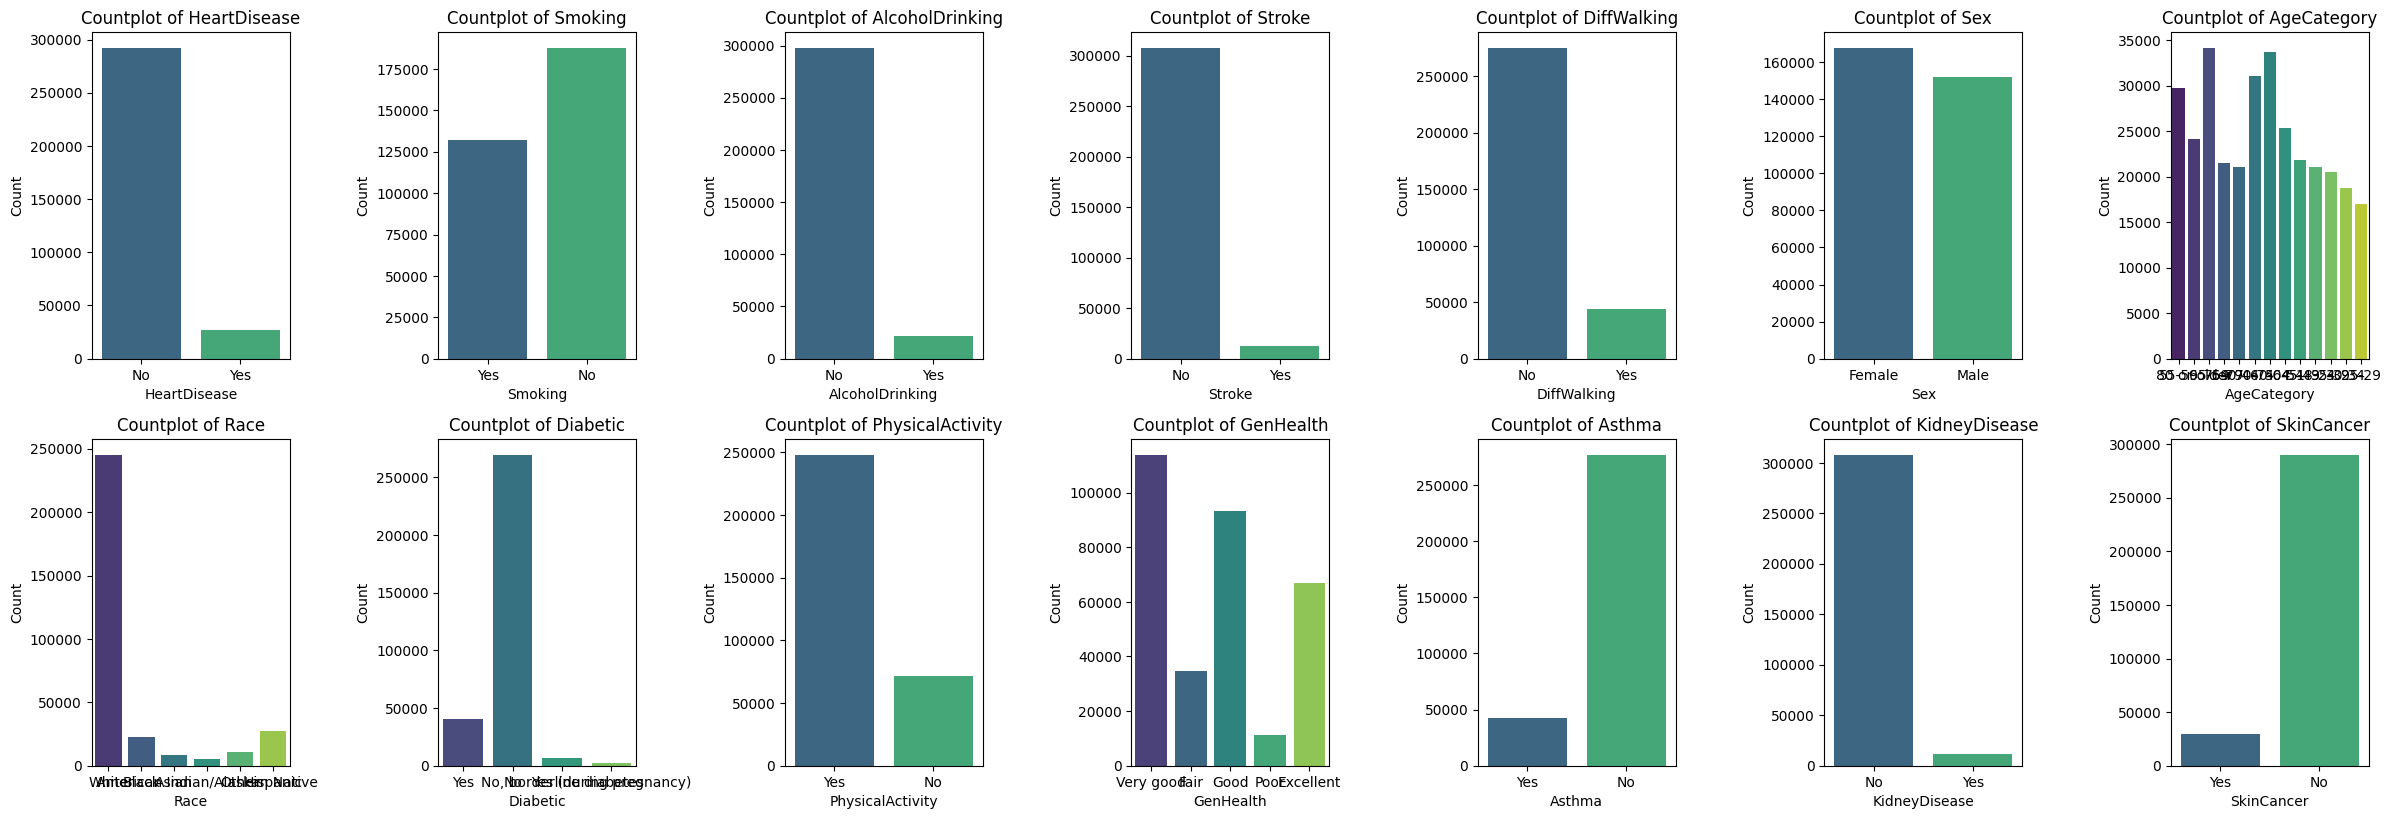

In [32]:
plt.figure(figsize=(24,16))
for i, feature in enumerate(categorical):
    plt.subplot(4, len(categorical)//2, i+1)
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f'Countplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

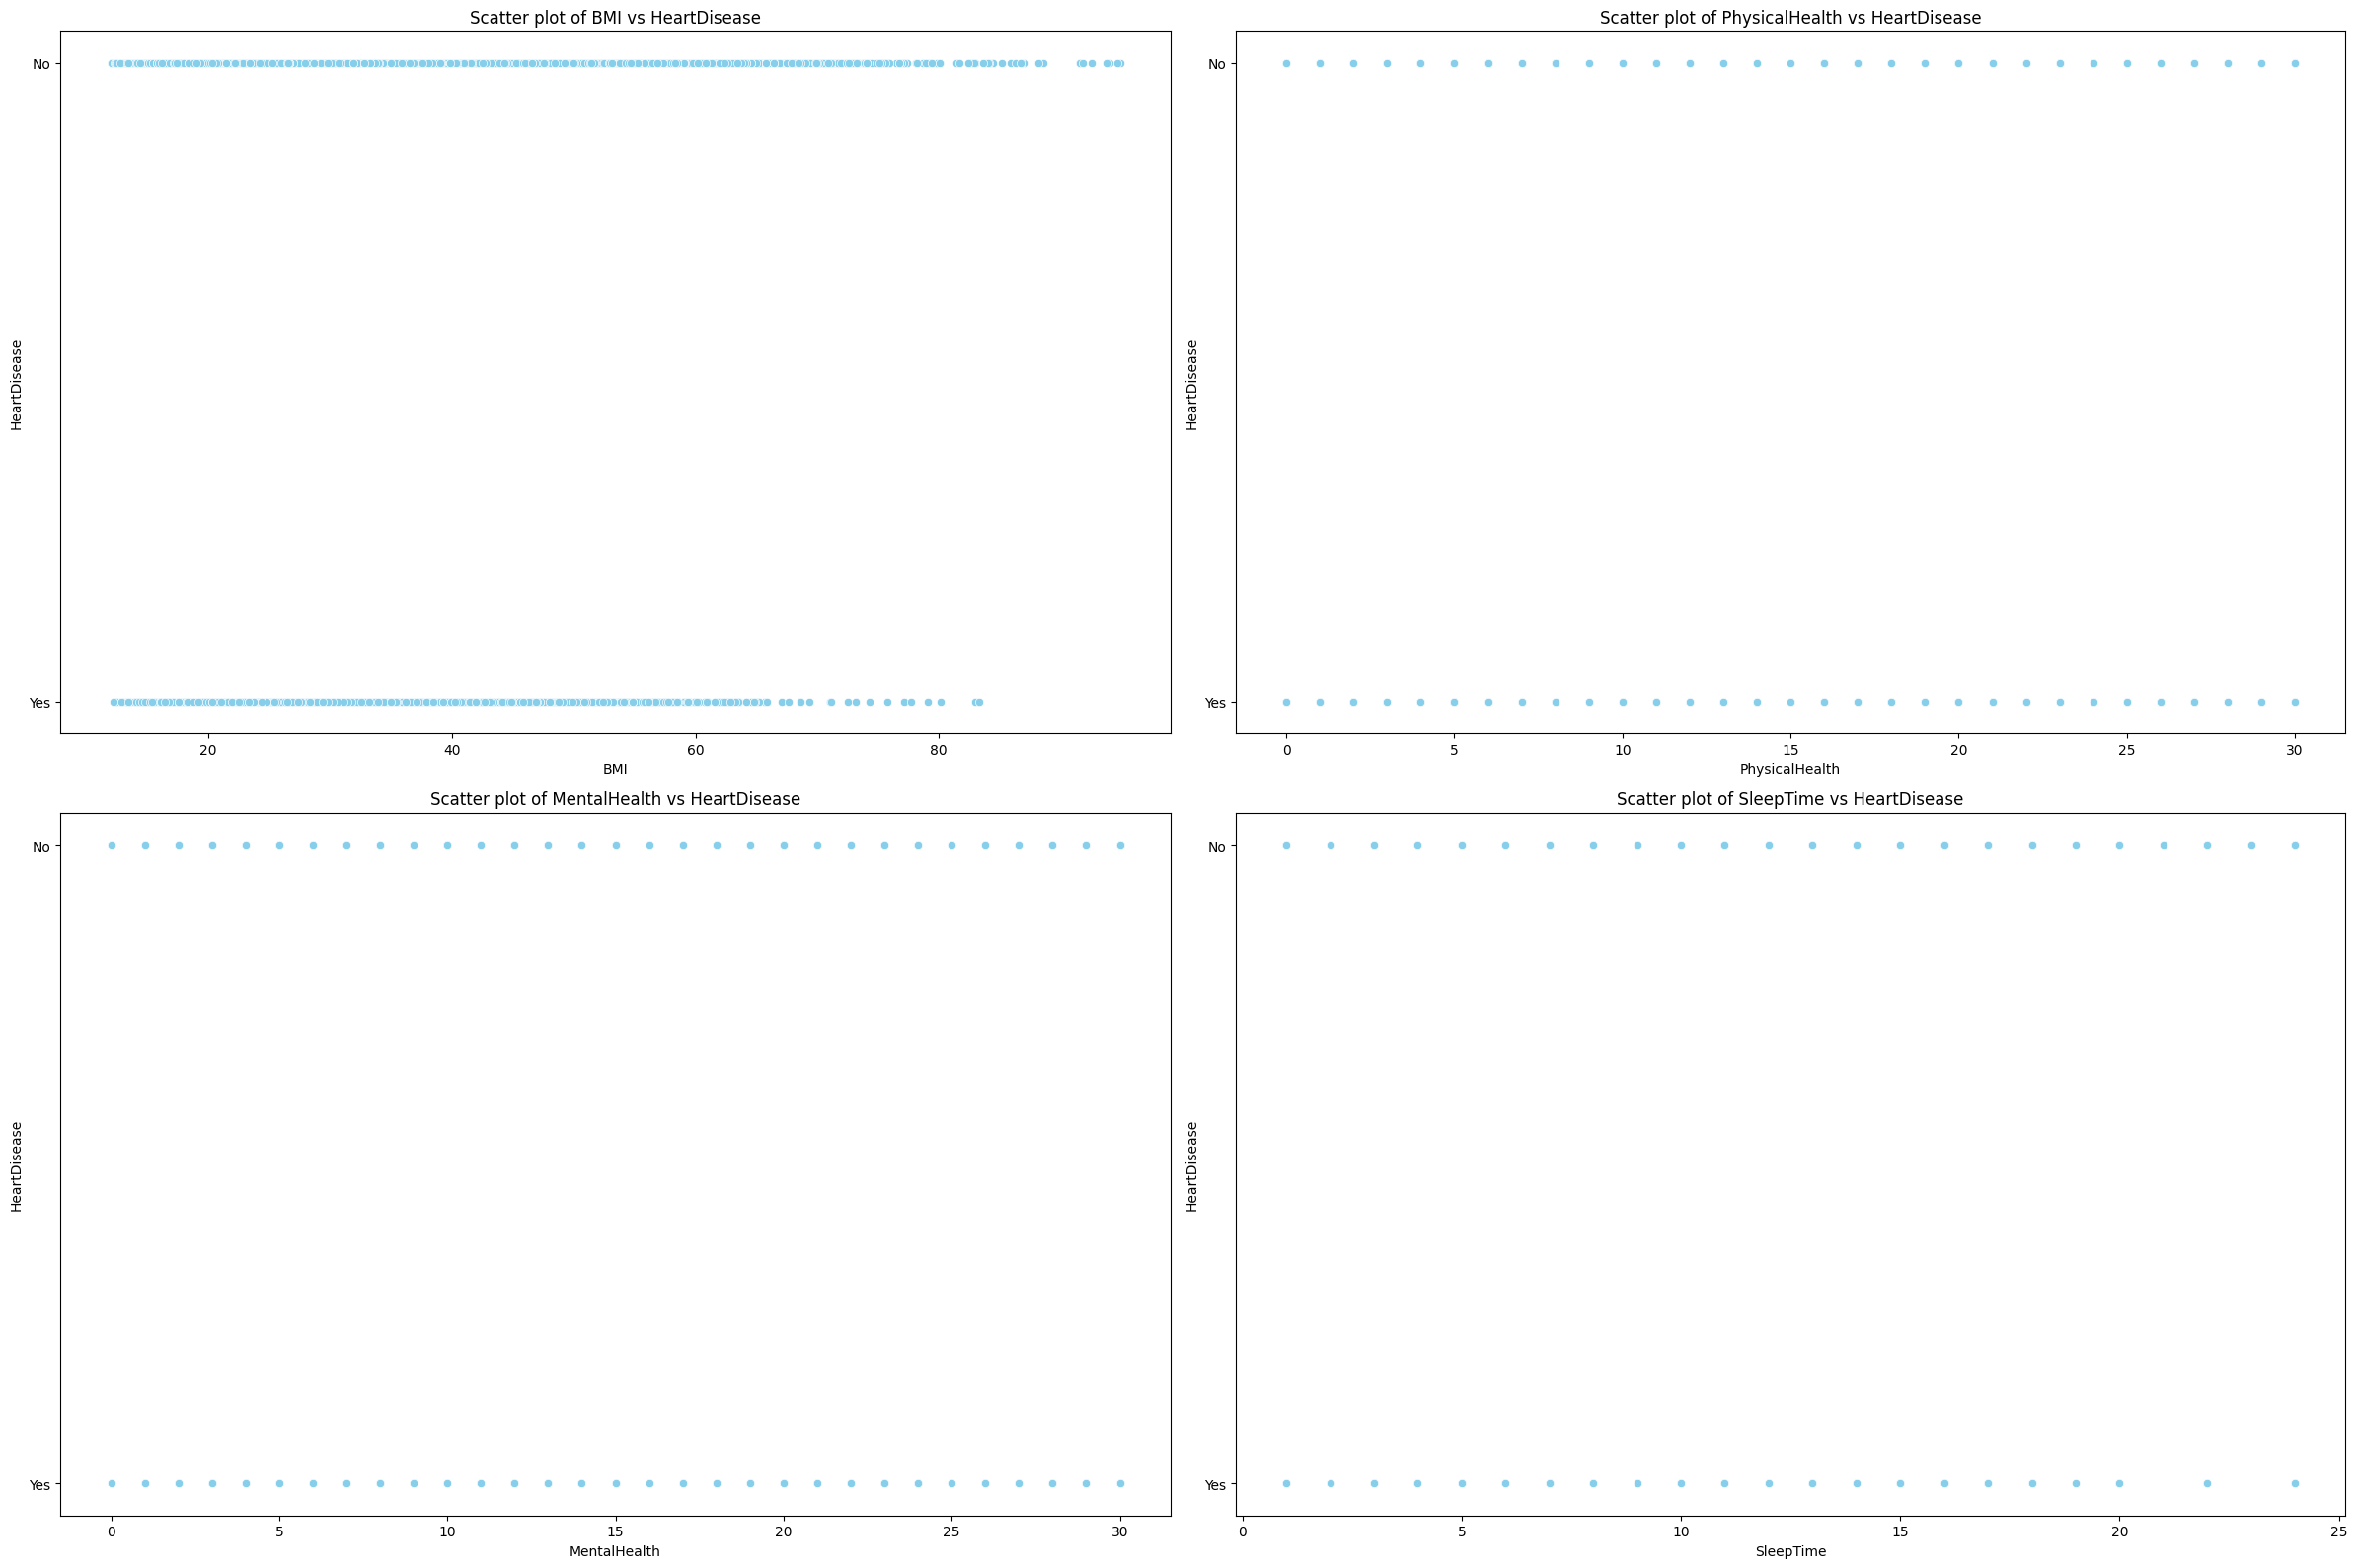

In [33]:
target_variable='HeartDisease'
plt.figure(figsize=(24,16))
for i, feature in enumerate(numerics):
    plt.subplot(2, len(numerics)//2, i+1)
    sns.scatterplot(data=df, x=feature, y=target_variable, color='skyblue')
    plt.title(f'Scatter plot of {feature} vs {target_variable}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

### Task 4: Feature Engineering


- Select relevant features for predicting heart disease.
- Consider creating new features from existing ones if necessary.


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df1 = pd.get_dummies(df, drop_first=True)

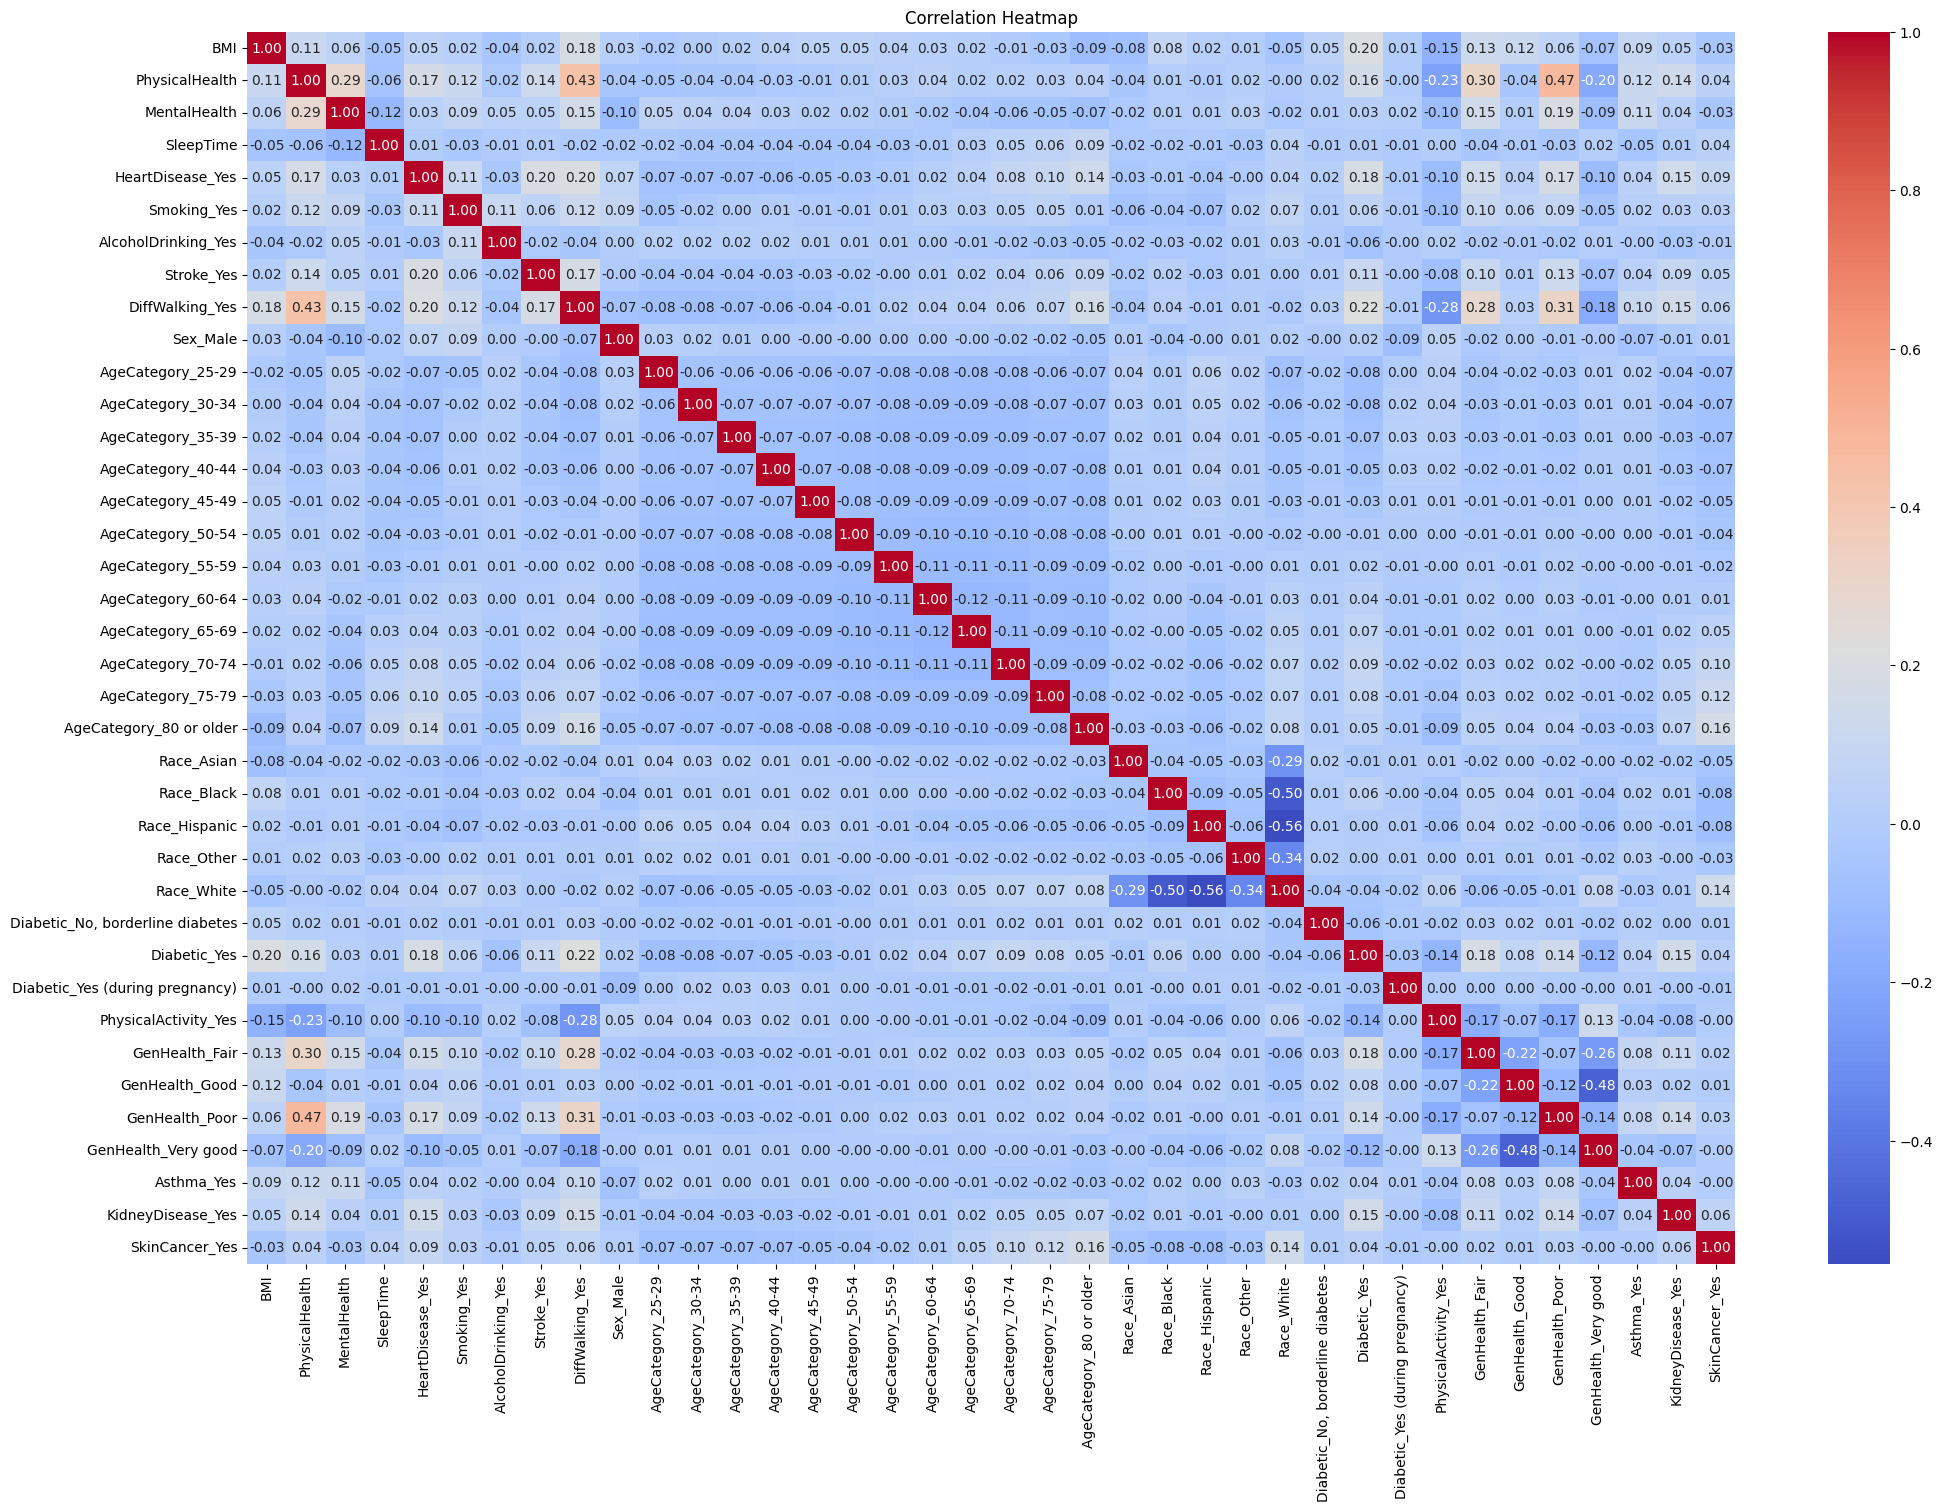

In [37]:
plt.figure(figsize=(24,16))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [38]:
df[categorical]

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,60-64,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,35-39,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,25-29,Hispanic,No,No,Good,No,No,No


### Task 5: Model Building


- Build a logistic regression model using the training set.
- Apply standard scaling to numerical features if necessary.


In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_inputs[numerics + encoded_cols], train_target)

LogisticRegression()

In [40]:
print(model.coef_)

[[ 0.0500158   0.03185992  0.03521003 -0.04151677 -0.34572671 -0.00231364
  -0.04642872 -0.30161163 -0.67396406  0.32592371 -0.29637989 -0.05166046
  -0.5292486   0.18120825 -1.53641973 -1.47066497 -1.21103566 -1.11735512
  -0.65167904 -0.23300024  0.09200097  0.33814257  0.59202901  0.83771986
   1.11136052  1.30330145  1.59756002  0.15350922 -0.32634396 -0.20126711
  -0.12098341  0.04584006  0.10120484 -0.28668815 -0.11193039  0.19243215
  -0.14185396 -0.20262131 -0.14541904 -1.05759356  0.47709183 -0.01999603
   0.8276201  -0.5751627  -0.30141128 -0.04662907 -0.44972996  0.10168961
  -0.21528686 -0.13275349]]


In [41]:
print(model.intercept_)

[-0.35428716]


In [42]:
train_pred = model.predict(train_inputs[numerics + encoded_cols])
val_pred = model.predict(val_inputs[numerics + encoded_cols])
test_pred = model.predict(test_inputs[numerics + encoded_cols])

### Task 6: Model Evaluation


- Evaluate the model on the testing set using appropriate metrics.
- Discuss the model's performance and any areas for improvement.


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [44]:
test_target.value_counts()

HeartDisease
No     87649
Yes     8290
Name: count, dtype: int64

In [45]:
print("Accuracy_Score is:",accuracy_score(test_target, test_pred))

Accuracy_Score is: 0.9145081770708471


In [46]:
test_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [47]:
test_target

271884    No
270361    No
219060    No
24010     No
181930    No
          ..
258889    No
199549    No
40243     No
109200    No
142745    No
Name: HeartDisease, Length: 95939, dtype: object

In [48]:
pos_label='Yes'

In [49]:
print("Precision_Score is:",precision_score(test_target, test_pred, pos_label=pos_label))

Precision_Score is: 0.5286458333333334


In [50]:
print("Recall_Score is:",recall_score(test_target, test_pred,pos_label=pos_label))

Recall_Score is: 0.09794933655006031


In [51]:
print("F1_Score is:",f1_score(test_target, test_pred,pos_label=pos_label))

F1_Score is: 0.16527579890087524
